# Recreating the client configurations

In [ ]:
# Imports

import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from client.client import FlowerClient

In [ ]:
# Set up font and text rendering
plt.style.use(["science", "ieee"])
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

## Generate deployment client configurations

In [ ]:
# Generate client configurations
FlowerClient.generate_deployment_clients(50, "logs/clients/clients1001.json", seed=1001)
FlowerClient.generate_deployment_clients(50, "logs/clients/clients1002.json", seed=1002)
FlowerClient.generate_deployment_clients(50, "logs/clients/clients1003.json", seed=1003)
FlowerClient.generate_deployment_clients(50, "logs/clients/clients1004.json", seed=1004)
FlowerClient.generate_deployment_clients(50, "logs/clients/clients1005.json", seed=1005)

In [3]:
# Read the client configurations
idxss, batch_sizess, local_epochss, data_volumess, data_labelss = [], [], [], [], []
for log_file in ["logs/clients/clients1001.json", "logs/clients/clients1002.json", "logs/clients/clients1003.json", "logs/clients/clients1004.json", "logs/clients/clients1005.json"]:
    idxs, batch_sizes, local_epochs, data_volumes, data_labels = FlowerClient.read_many(log_file)
    idxss.append(idxs)
    batch_sizess.append(batch_sizes)
    local_epochss.append(local_epochs)
    data_volumess.append(data_volumes)
    data_labelss.append(data_labels)

In [ ]:
# TODO: DELETE

# Calculate frequencies
values1, counts1 = np.unique(batch_sizes, return_counts=True)
values2, counts2 = np.unique(local_epochs, return_counts=True)

# Set up font and text rendering
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Create 2 bar charts from the data volumes and data labels
fig, ax = plt.subplots(1, 2, figsize=(505/72/1.5, 505/72/3))

# Bar chart for array1
ax[0].bar([str(val) for val in values1], counts1, color='#577590', alpha=0.7)
ax[0].set_title("Batch Size Distribution")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")

# Bar chart for array2
ax[1].bar([str(val) for val in values2], counts2, color='#43AA8B', alpha=0.7)
ax[1].set_title("Local Epochs Distribution")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.savefig('for-report/fig_client.pdf')
plt.show()


# Visualize batch size and local epoch distribution
For 5 client configurations generated using seeds 1001 to 1005 (see above)

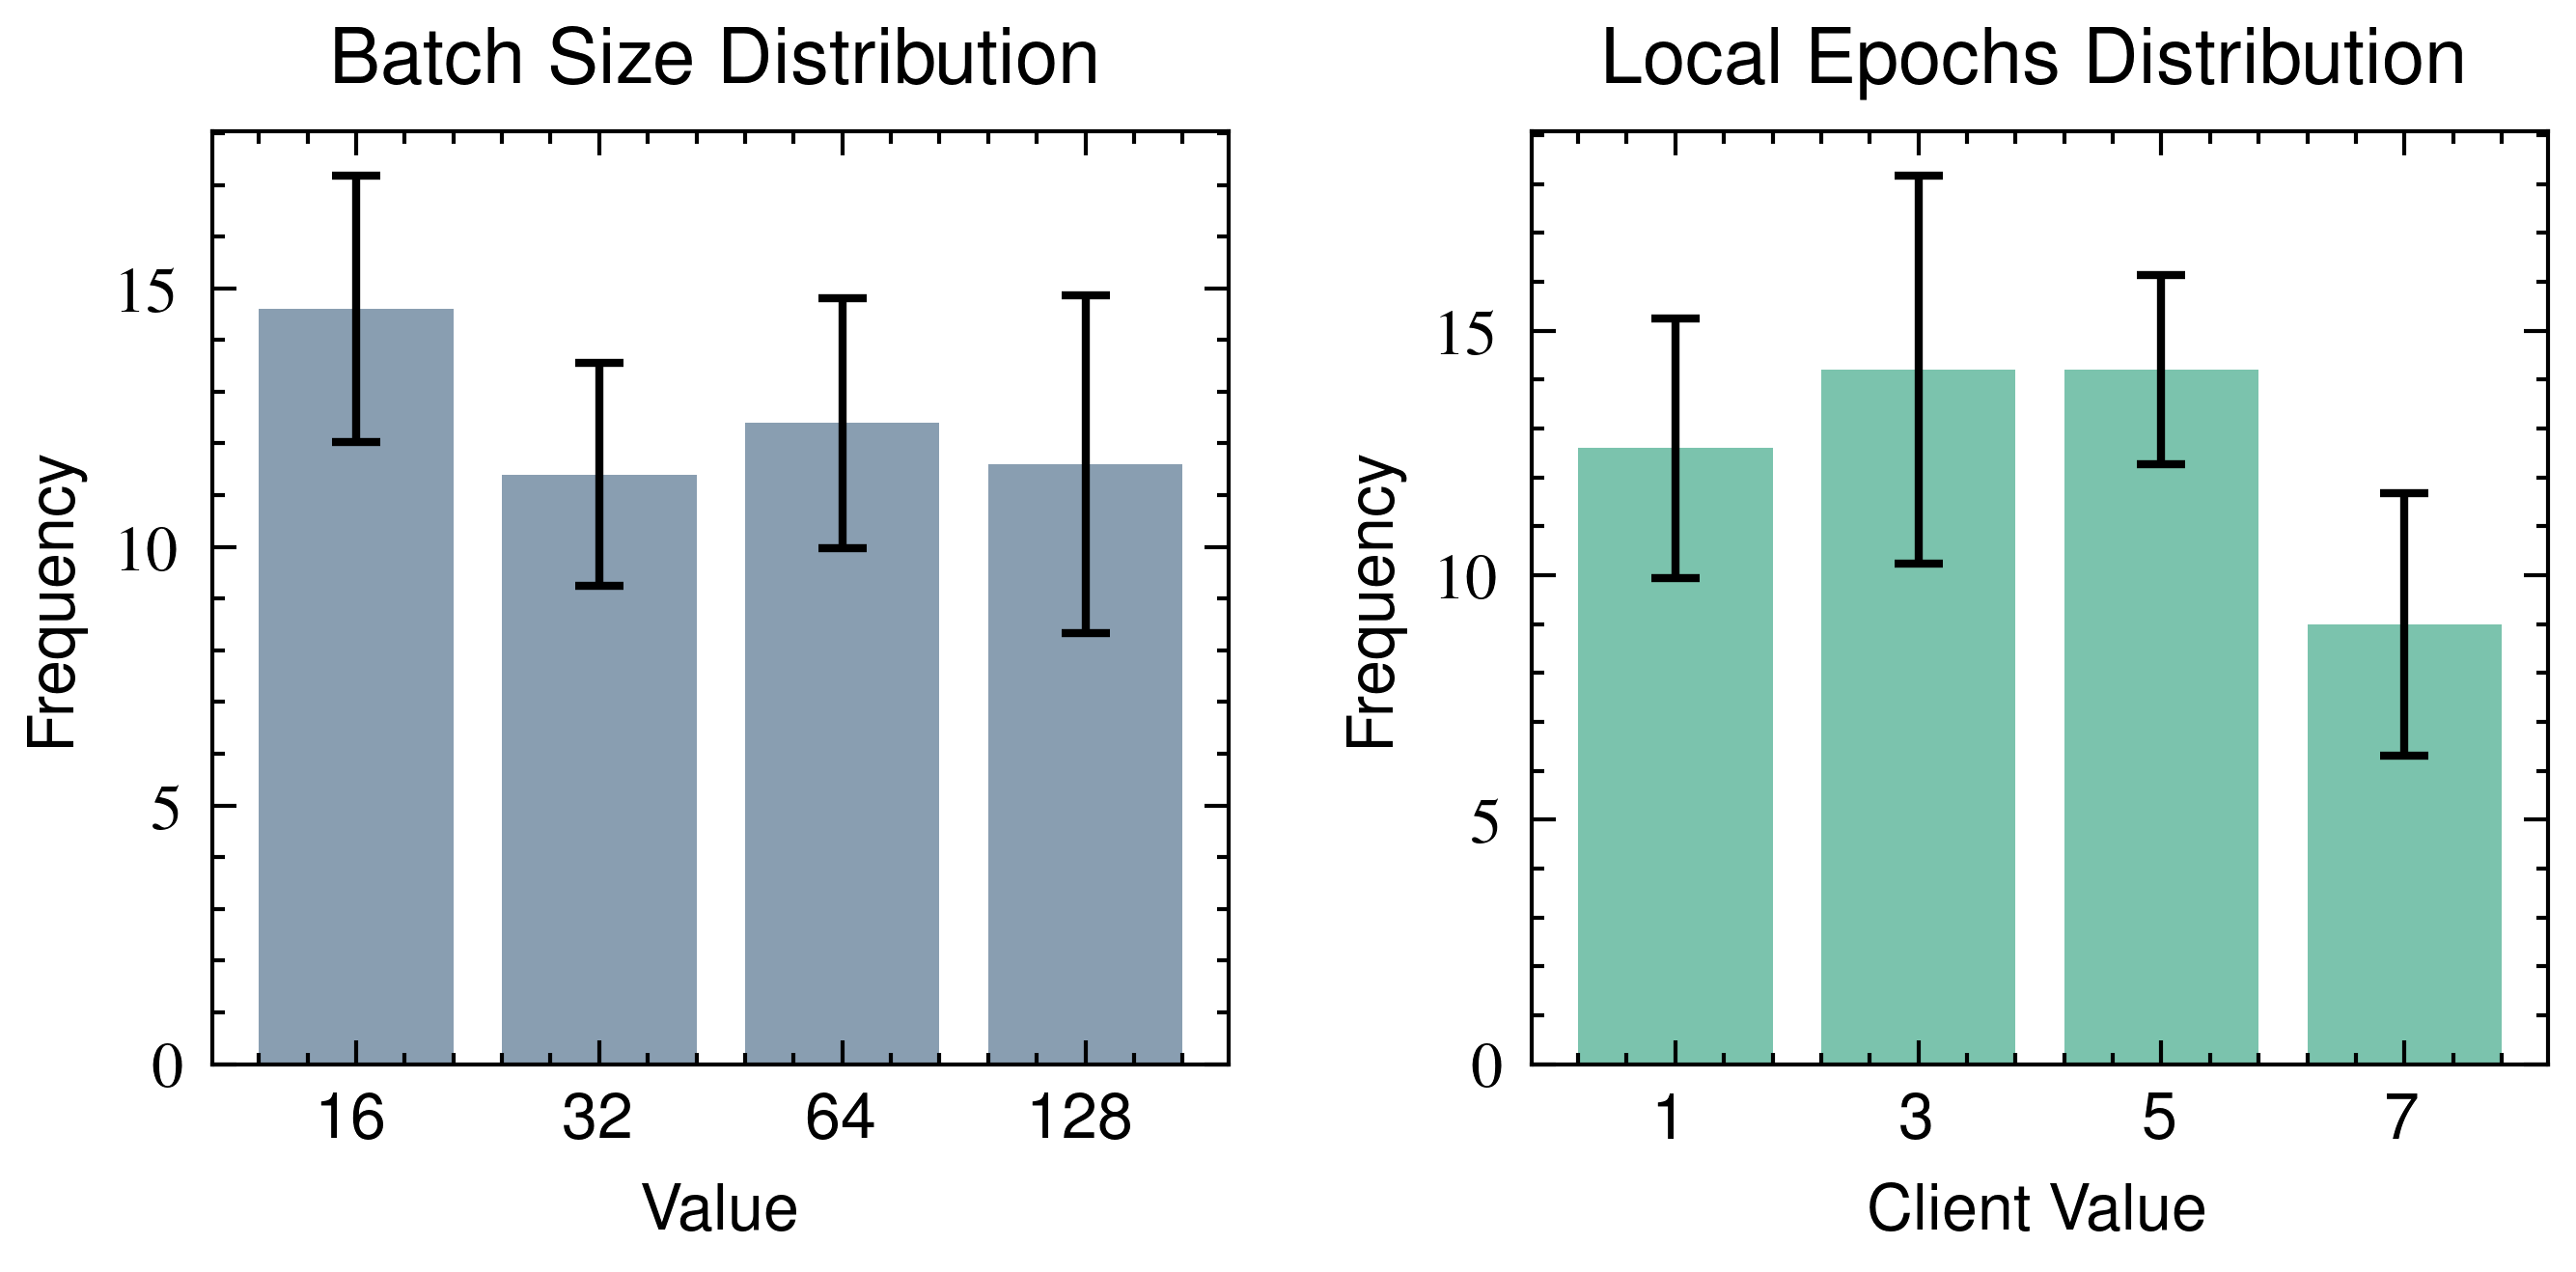

In [26]:
# Calculate frequencies
batch_values_and_counts = [np.unique(batch_sizes, return_counts=True) for batch_sizes in batch_sizess]
epoch_values_and_counts = [np.unique(local_epochs, return_counts=True) for local_epochs in local_epochss]

batch_values = [str(val) for val in batch_values_and_counts[0][0]]
batch_means = np.mean([counts for _, counts in batch_values_and_counts], axis=0)
batch_stddev = np.std([counts for _, counts in batch_values_and_counts], axis=0)
# batch_counts = [counts for _, counts in batch_values_and_counts]

epoch_values = [str(val) for val in epoch_values_and_counts[0][0]]
epoch_means = np.mean([counts for _, counts in epoch_values_and_counts], axis=0)
epoch_stddev = np.std([counts for _, counts in epoch_values_and_counts], axis=0)
# epoch_counts = [counts for _, counts in epoch_values_and_counts]

# Set up font and text rendering
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Create 2 bar charts from the data volumes and data labels
fig, ax = plt.subplots(1, 2, figsize=(505/72/1.5, 505/72/3))

# Bar chart for array1
ax[0].bar(batch_values, batch_means, color='#577590', alpha=0.7, yerr=batch_stddev, capsize=3)
ax[0].set_title("Batch Size Distribution")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")

# Bar chart for array2
ax[1].bar(epoch_values, epoch_means, color='#43AA8B', alpha=0.7, yerr=epoch_stddev, capsize=3)
ax[1].set_title("Local Epochs Distribution")
ax[1].set_xlabel("Client Value")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.savefig('for-report/fig_client.pdf')
plt.show()

# Visualize data volume and data label distribution
For 5 client configurations generated using seeds 1001 to 1005 (see above)

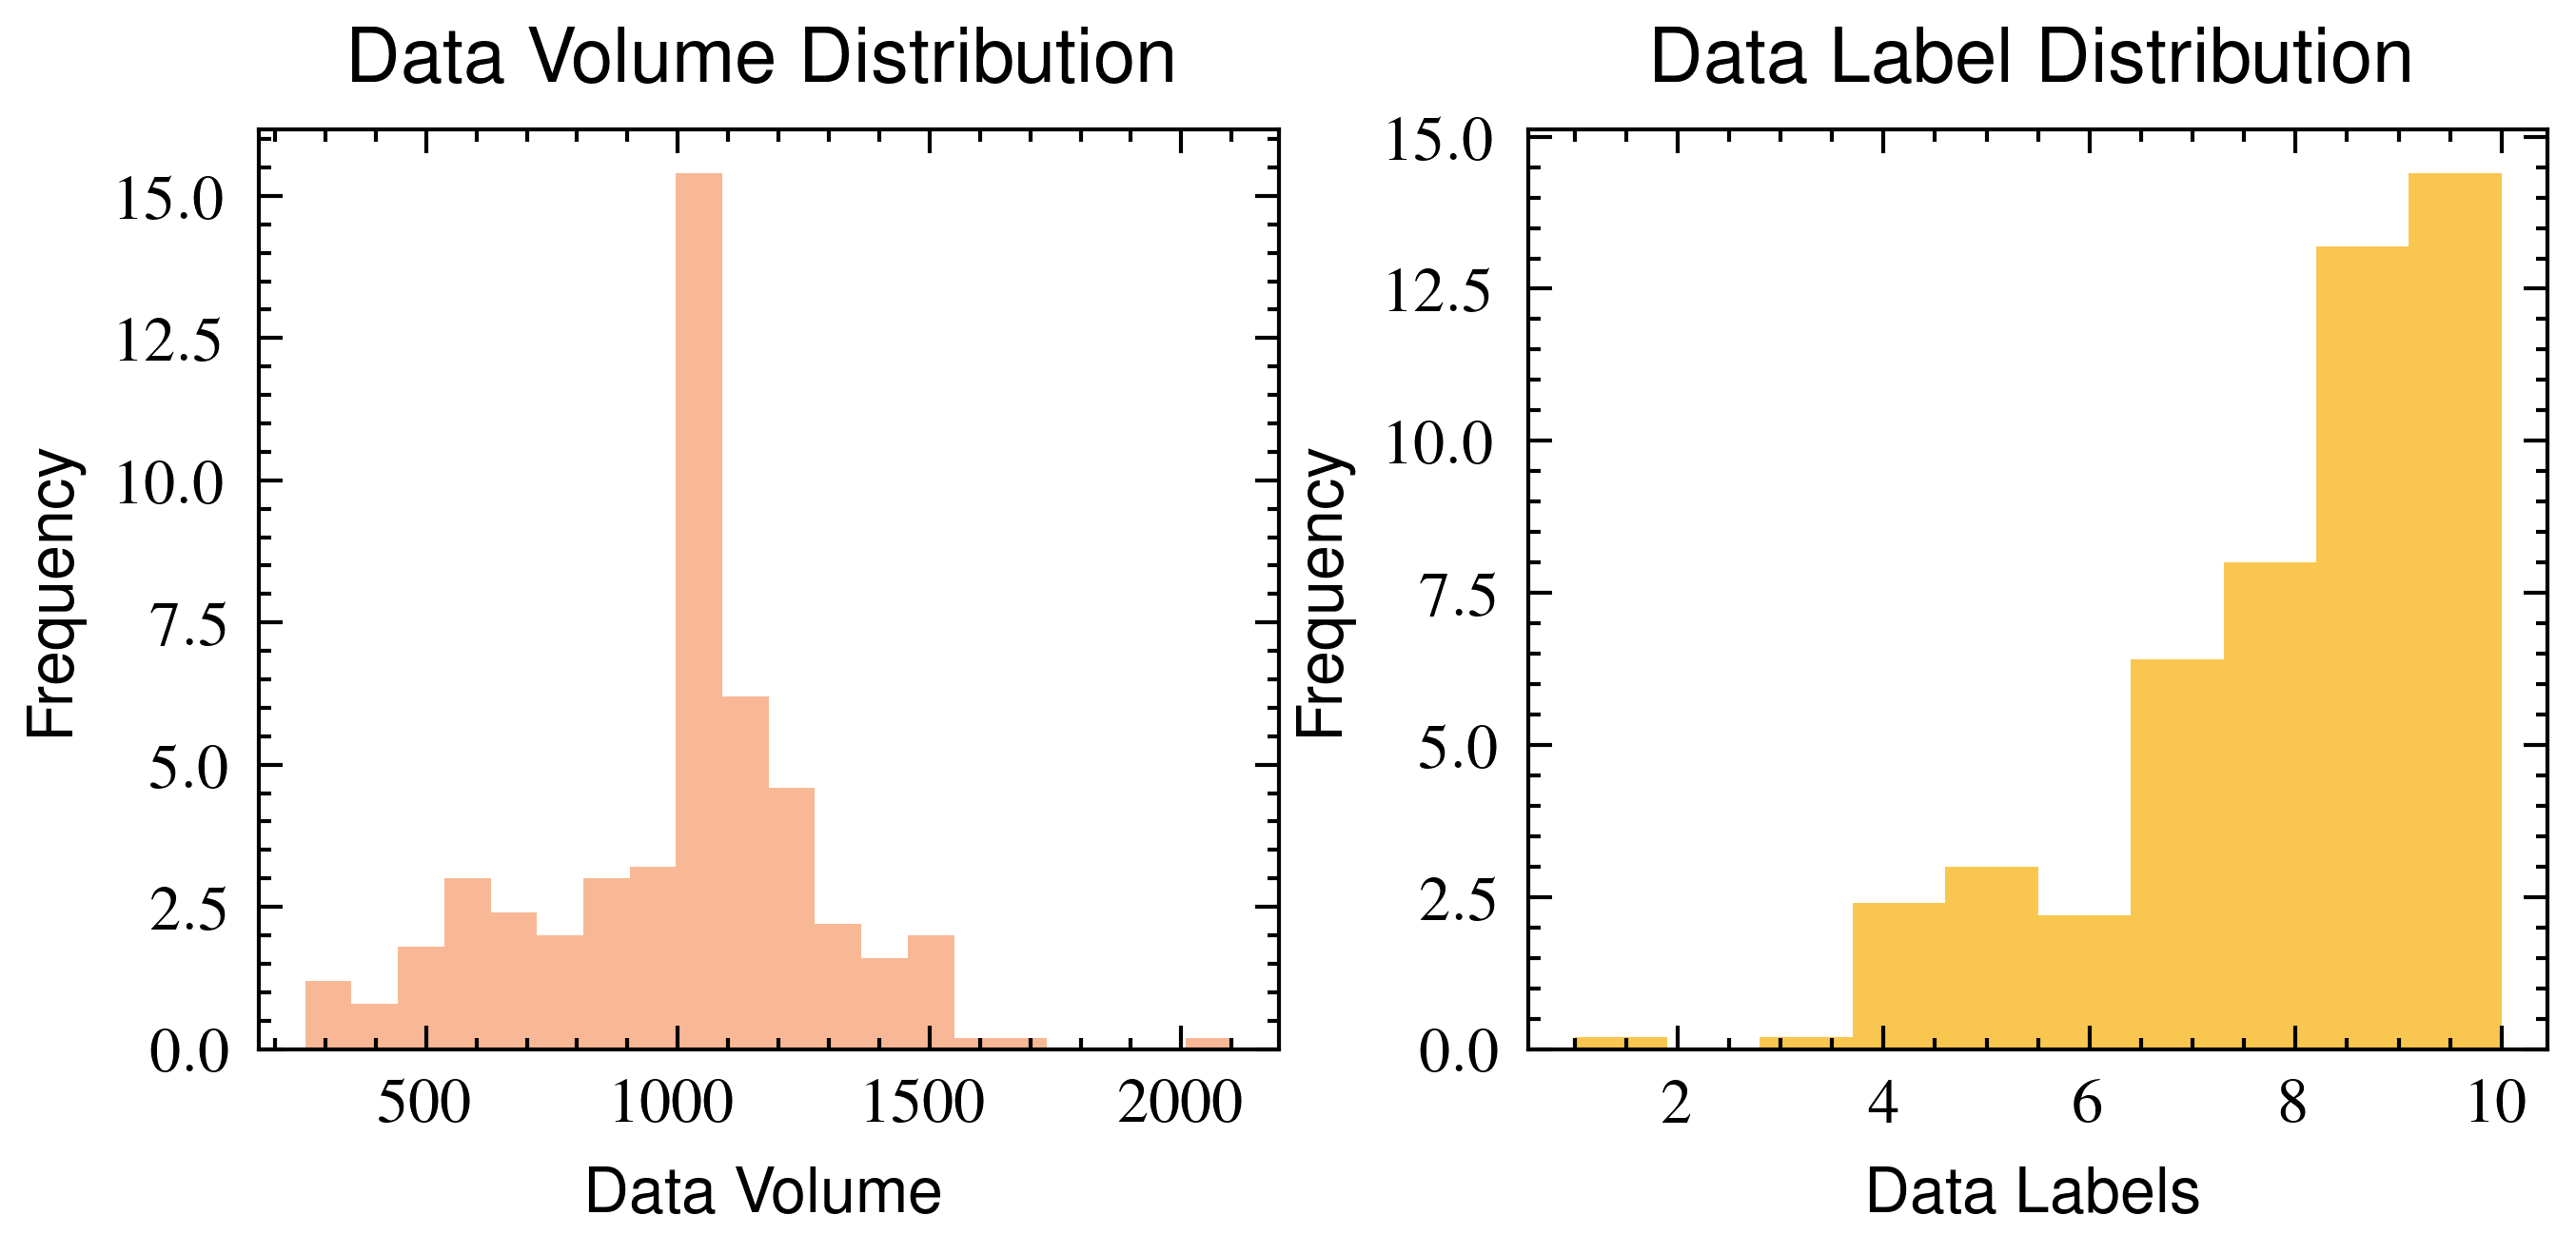

In [25]:
# Combine all data volumes and data labels

# data_volumes = np.concatenate(data_volumess)
# data_labels = np.concatenate(data_labelss)

fig, ax = plt.subplots(1, 2, figsize=(505/72/1.5, 505/72/3))
data_volumes = np.concatenate(data_volumess)
ax[0].hist(data_volumes, bins=20, alpha=0.5, color="#F3722C", weights=np.ones_like(data_volumes) / len(data_volumess))
ax[0].set_title("Data Volume Distribution")
ax[0].set_xlabel("Data Volume")
ax[0].set_ylabel("Frequency")

data_labels = np.concatenate(data_labelss)
ax[1].hist(data_labels, bins=10, color="#F9C74F", weights=np.ones_like(data_labels) / len(data_volumess))
ax[1].set_title("Data Label Distribution")
ax[1].set_xlabel("Data Labels")
ax[1].set_ylabel("Frequency")

plt.tight_layout()

plt.savefig(f'for-report/fig_data.pdf')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: 5 runs of an experiment with 10 data points each
runs = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    [1, 3, 4, 5, 7, 8, 9, 10, 11, 12],
    [2, 3, 5, 6, 7, 8, 9, 11, 12, 13],
    [1, 2, 4, 5, 6, 8, 9, 10, 12, 14]
])

# Calculate the mean and standard deviation for each data point
mean = np.mean(runs, axis=0)
std_dev = np.std(runs, axis=0)

# Calculate the upper and lower bounds of the confidence interval
upper_bound = mean + std_dev
lower_bound = mean - std_dev

# Plot the mean with confidence boundaries
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mean, label='Mean', color='blue')
plt.fill_between(range(1, 11), lower_bound, upper_bound, color='blue', alpha=0.2, label='±1 Std Dev')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Mean with Confidence Boundaries')
plt.legend()
plt.show()

In [ ]:
from client.client import FlowerClient
from data.noniid_load_dataset import load_all_clients

idxs, batch_sizes, local_epochs, data_volumes, data_labels = FlowerClient.read_many("logs/run_125/clients.json")
train_dls, test_dls = load_all_clients(
    idxs, 
    batch_sizes,
    "cifar10"
)


In [ ]:
from visualization.data import RunData

run_combinations = [
    "run_120",
    "run_121",
    "run_122",
    "run_123",
    "run_124",
    "run_125",
    "run_126",
]

run_combinations = RunData.build_many(run_combinations, base_path="logs")

In [ ]:

print(run_combinations)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def get_matrix(operation, arrays):
    num_arrays = len(arrays)
    mse_matrix = np.zeros((num_arrays, num_arrays))
    
    for i, j in itertools.combinations(range(num_arrays), 2):
        mse = operation(arrays[i], arrays[j])
        mse_matrix[i, j] = mse
        mse_matrix[j, i] = mse
    
    return mse_matrix



In [ ]:
from visualization.utils import (
    calculate_mae,
    calculate_mse,
    calculate_dtw,
    calculate_pearson_correlation,
)

mse_matrix = get_matrix(calculate_mse, [100 * np.array(run.get_metric("accuracy").y) for run in run_combinations])

fig, ax = plt.subplots()
cax = ax.matshow(mse_matrix, cmap='gist_gray', interpolation='none')
fig.colorbar(cax)

avg = np.average(mse_matrix)

for (i, j), z in np.ndenumerate(mse_matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white' if z < avg / 1.5 else 'black')

# Set ticks and labels
num_arrays = len(run_combinations)
ax.set_xticks(range(num_arrays))
ax.set_yticks(range(num_arrays))
ax.set_xticklabels([f'{run_combinations[i].run_config.get_label(short=True)}' for i in range(num_arrays)])
ax.set_yticklabels([f'{run_combinations[i].run_config.get_label(short=True)}' for i in range(num_arrays)])

# Rotate the x-axis labels and move them to the bottom
ax.tick_params(axis='x', labelrotation=80)
# plt.xticks(rotation=45, ha='right')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

plt.title('MSE Correlogram')
plt.show()